In [1]:
import os  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys  # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path  # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

In [3]:
# Set Variables
site_list = ['Indeed', 'Glassdoor', 'LinkedIn']
nan_list = [None, 'None', '', ' ', [], -1, '-1', 0, '0', 'nan', np.nan, 'Nan']
pattern = r'[\n]+|[,]{2,}|[|]{2,}|[\n\r]+|(?<=[a-z]\.)(?=\s*[A-Z])|(?=\:+[A-Z])'
alpha = 0.050
normality_tests_labels = ['Statistic', 'p-value']
ngrams_list=[1, 2, 3, 123]
embedding_libraries_list = ['spacy', 'nltk', 'gensim']
ivs = ['Gender', 'Age']
ivs_all = [
    'Gender',
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Gender_Female_n',
    'Gender_Male_n',
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
    'Age',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
    'Age_Older_n',
    'Age_Younger_n',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_count = [
    'Gender_Female_n',
    'Gender_Male_n',
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_gender_count = [
    'Gender_Female_n',
    'Gender_Male_n',
]
ivs_age_count = [
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_perc = [
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_gender_perc = [
    'Gender_Female_% per Sector'
    'Gender_Male_% per Sector',
]
ivs_age_perc = [
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_all_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_all_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_gender_dummy_num = [
    'Gender_Num',
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_gender_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
]
ivs_age_dummy_num = [
    'Age_Num',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
ivs_age_dummy_num = [
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
gender_order = ['Female', 'Mixed Gender', 'Male']
age_order = ['Older', 'Mixed Age', 'Younger']
platform_order = ['LinkedIn', 'Indeed', 'Glassdoor']
ivs_dict = {'Gender': gender_order, 'Age': age_order}
dvs = [
    'Warmth', 'Competence'
]
dvs_all = [
    'Warmth', 'Competence', 'Warmth_Probability', 'Competence_Probability'
]
dvs_prob = [
    'Warmth_Probability', 'Competence_Probability'
]

cat_list = [
    'Job ID',
    'Gender',
    'Gender_Female',
    'Gender_Male',
    'Gender_Mixed',
    'Age',
    'Age_Older',
    'Age_Younger',
    'Gender_Mixed',
    'Language',
    'English Requirement',
    'Dutch Requirement'
]

# Plotting variables
pp = pprint.PrettyPrinter(indent=4)
tqdm.tqdm.pandas(desc='progress-bar')
tqdm_auto.tqdm.pandas(desc='progress-bar')
# tqdm.notebook.tqdm().pandas(desc='progress-bar')
tqdm_auto.notebook_tqdm().pandas(desc='progress-bar')
# pbar = progressbar.ProgressBar(maxval=10)
mpl.style.use(f'{code_dir}/setup_module/apa.mplstyle-main/apa.mplstyle')
mpl.rcParams['text.usetex'] = False
font = {'family': 'arial', 'weight': 'normal', 'size': 10}
mpl.rc('font', **font)
plt.style.use('tableau-colorblind10')
plt.set_cmap('Blues')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', '{:.2f}'.format)


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

# Functions

### READ DATA

In [15]:
with open(f'{data_dir}df_manual_len.txt', 'rb') as f:
    df_manual_len = int(pickle.load(f))

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl').reset_index(drop=True)
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'


# Analysis

## ANOVA

In [5]:
dataframes = {
    'df_manual': df_manual,
    # 'df_jobs': df_jobs,
}

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
====== RESULTS FOR df_manual ======


  0%|          | 0/4 [00:00<?, ?it/s]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent Variable: Warmth
Independent Variable: Gender
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


--------------------
FREQUENCIES
IVs: Gender
  Variable    Outcome     Count  Percent
0  Gender   Mixed Gender  4191   77.99  
1                   Male   631   11.74  
2                 Female   552   10.27  
--------------------


--------------------
DVs: Warmth


  Variable     N    Mean  SD   SE   95% Conf.  Interval
0  Warmth  5374.00  0.25 0.43 0.01    0.24       0.27  


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


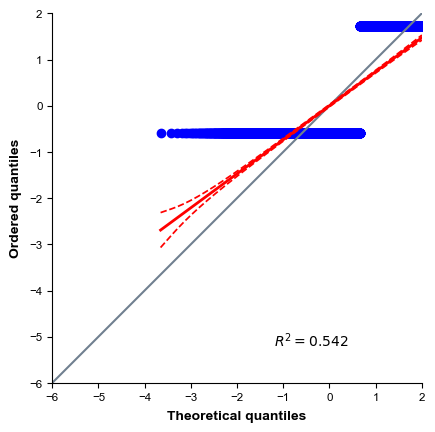

--------------------


Warmth Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1072.3379723947405
p-value :  1.3956223854805661e-233


Warmth Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  -17.50096191387051
p-value :  1.4086988158021844e-68


Warmth Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.5416131019592285
p-value :  0.0


Warmth Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1280.303500673048
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth
Gender x Warmth Normality test:
               W   pval  normal
Gender                         
Mixed Gender 0.55  0.00   False
Male         0.50  0.00   False
Female       0.56  0.00   

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
Gender          2  993.192  3.814    0.022  0.001

~~~~~~~~~~~~~~~~~~~~


KRUSKAL-WALLIS ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth
Source      ddof1      H    p-unc
--------  -------  -----  -------
Gender          2  6.956    0.031

~~~~~~~~~~~~~~~~~~~~


INTERACTION ONE-WAY ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender and Age x Warmth

ANOVA SUMMARY

Source              SS        DF     MS        F    p-unc      np2
------------  --------  --------  -----  -------  -------  -------
Gender           0.000     2.000  0.000    0.000    1.000    0.000
Age              0.000     2.000  0.000    0.000    1.000    0.000
Gender * Age     1.198     4.000  0.299    1.582    0.192    0.001
Residual      1015.983  5367.000  0.189  nan      nan      nan

~~~~~~~~~~~~~~~~~~~~


POST HOC GAMES HOWELL ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender x Warmth

POST HOC TESTS

A       B               mean(

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


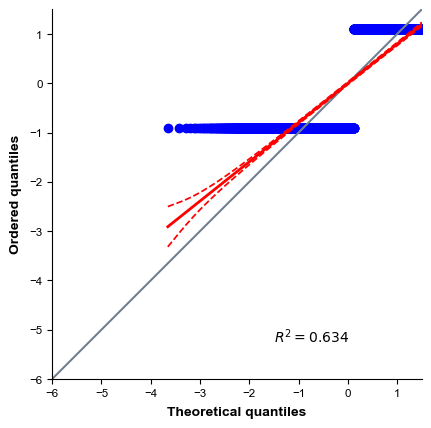

--------------------


Competence Test of Normality:
--------------------------------------------------------------------------------
Statistic :  19055.86059894191
p-value :  0.0


Competence Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  137.93298227007529
p-value :  0.0


Competence Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.6335444450378418
p-value :  0.0


Competence Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  976.225547825099
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Gender x Competence
Gender x Competence Normality test:
               W   pval  normal
Gender                         
Mixed Gender 0.63  0.00   False
Male         0.64  0.00   False
Female       0.63  0.00   False
~~~~~~~~~~~

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco

                            OLS Regression Results                            
Dep. Variable:             Competence   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.703
Date:                Thu, 06 Apr 2023   Prob (F-statistic):            0.00239
Time:                        21:13:29   Log-Likelihood:                -3868.2
No. Observations:                5374   AIC:                             7748.
Df Residuals:                    5368   BIC:                             7788.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

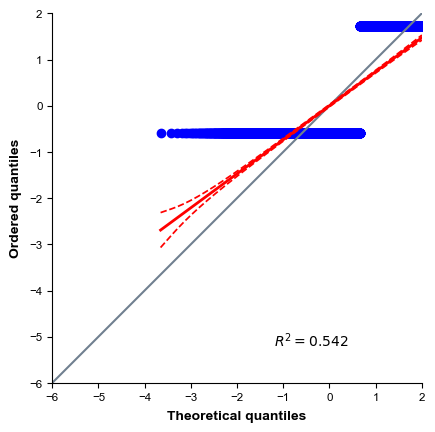

--------------------


Warmth Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1072.3379723947405
p-value :  1.3956223854805661e-233


Warmth Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  -17.50096191387051
p-value :  1.4086988158021844e-68


Warmth Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.5416131019592285
p-value :  0.0


Warmth Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  1280.303500673048
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
Age x Warmth Normality test:
            W   pval  normal
Age                         
Mixed Age 0.56  0.00   False
Younger   0.54  0.00   False
Older     0.50  0.00   False
~~~~~~~~~~~~~~~

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco

--------------------
Age x Warmth Sphericity test:
True at p-value: 1.0, chi-square: -inf, degrees of freedom: 28202, Test statistic: 0
~~~~~~~~~~~~~~~~~~~~


LEVENE'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
Age x Warmth Levene's test:
         W   pval  equal_var
levene 6.69  0.00    False  
~~~~~~~~~~~~~~~~~~~~


BARTLETT'S TEST


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
Age x Warmth Bartlett's test:
           T   pval  equal_var
bartlett 9.71  0.01    False  
~~~~~~~~~~~~~~~~~~~~


ANOVA SIGNIFICANCE


~~~~~~~~~~~~~~~~~~~~
Age x Warmth
--------------------
One-way ANOVA p-value: 0.0012583622567810834. Rejected: True
~~~~~~~~~~~~~~~~~~~~
SUMMARY ANOVA


~~~~~~~~~~~~~~~~~~~~
Age x Warmth


             N   Mean  SD   SE   95% Conf.  Interval
Age                                                 
Mixed Age  1949  0.28 0.45 0.01    0.26       0.30  
Older       638  0.20 0.40 0.02    0.17       0.24  
Younger    2787  0.25 0.43 0.01    0.23       0.27  
~~~~~~~~~~~~~~~~~~~~


INTEACTION ANOVA 

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


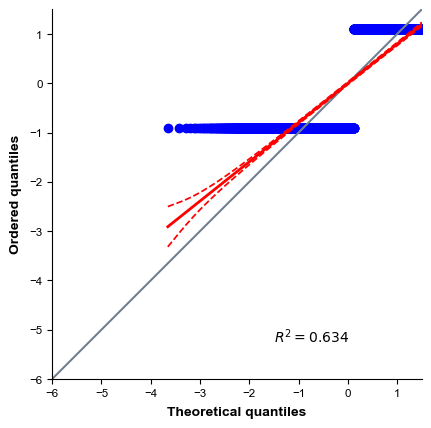

--------------------


Competence Test of Normality:
--------------------------------------------------------------------------------
Statistic :  19055.86059894191
p-value :  0.0


Competence Skewness-Kurtosis Test of Normality:
--------------------------------------------------------------------------------
Statistic :  137.93298227007529
p-value :  0.0


Competence Shapir-Wilk Test of Normality:
--------------------------------------------------------------------------------
Statistic :  0.6335444450378418
p-value :  0.0


Competence Anderson-Darling Test of Normality:
--------------------------------------------------------------------------------
Statistic :  976.225547825099
p-value :  [0.576 0.656 0.786 0.917 1.091]


NORMALITY TEST


~~~~~~~~~~~~~~~~~~~~
Age x Competence
Age x Competence Normality test:
            W   pval  normal
Age                         
Mixed Age 0.64  0.00   False
Younger   0.63  0.00   False
Older     0.64  0.00   False
~~~~~~~~~~~~~~~~~~~~


SPHERICIT

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1002: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  S = data.cov().to_numpy()  # NumPy, otherwise S.mean() != grandmean
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: overflow encountered in scalar power
  W = np.product(eig) / (eig.sum() / d) ** d
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/pingouin/distribution.py:1007: RuntimeWarning: divide by zero enco


ANOVA SUMMARY

Source      ddof1     ddof2      F    p-unc    np2
--------  -------  --------  -----  -------  -----
Age             2  1760.073  7.663    0.000  0.003

~~~~~~~~~~~~~~~~~~~~


KRUSKAL-WALLIS ANOVA


~~~~~~~~~~~~~~~~~~~~
Age x Competence
Source      ddof1       H    p-unc
--------  -------  ------  -------
Age             2  15.366    0.000

~~~~~~~~~~~~~~~~~~~~


INTERACTION ONE-WAY ANOVA


~~~~~~~~~~~~~~~~~~~~
Gender and Age x Competence

ANOVA SUMMARY

Source              SS        DF      MS        F    p-unc      np2
------------  --------  --------  ------  -------  -------  -------
Gender          -0.000     2.000  -0.000   -0.000    1.000   -0.000
Age              0.000     2.000   0.000    0.000    1.000    0.000
Gender * Age     0.769     4.000   0.192    0.777    0.507    0.001
Residual      1328.933  5367.000   0.248  nan      nan      nan

~~~~~~~~~~~~~~~~~~~~


POST HOC GAMES HOWELL ANOVA


~~~~~~~~~~~~~~~~~~~~
Age x Competence

POST HOC TESTS

A          

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


In [6]:
for df_name, df in dataframes.items():

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')
    if df_name == 'df_jobs':
        dvs = dvs_prob

    for iv, dv in tqdm_product(ivs, dvs):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv}')
        print('+'*120)

        # FREQUENCIES
        print('\n')
        print('-' * 20)
        print('FREQUENCIES')
        print(f'IVs: {iv}')
        freq_iv=rp.summary_cat(df[[iv]]).round(3)
        print(freq_iv)
        freq_iv.to_csv(f'{table_save_path}frequencies {df_name} - {iv}.csv')
        print('-' * 20)
        print('\n')
        print('-' * 20)
        print(f'DVs: {dv}')
        freq_dv=rp.summary_cont(df[[dv]]).round(3)
        print(freq_dv)
        freq_dv.to_csv(f'{table_save_path}frequencies {df_name} - {dv}.csv')
        qq_plot = pg.qqplot(df[dv], dist='norm')
        plt.ion()
        plt.show()
        print('-' * 20)
        print('\n')

        # Test of Normality
        norm = scipy.stats.normaltest(df[dv])

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(df[dv])

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(df[dv])

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(df[dv])

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # NORMALITY TESTS
        print('NORMALITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        norm = pg.normality(data=df, dv=dv, group=iv).round(3)
        normal = bool(norm['normal'].to_string(index=False))
        print(f"{iv} x {dv} Normality test:\n{norm}")
        norm.to_csv(f"{table_save_path}normality {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # ANOVA SPHERICITY TEST
        print('SPHERICITY TEST')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        spher_all = pg.sphericity(data=df, dv=dv, within=iv, method='mauchly')
        spher, test_stat, chisq, dof, pval = spher_all
        print('-' * 20)
        print(f"{iv} x {dv} Sphericity test:\n{spher} at p-value: {round(pval, 3)}, chi-square: {round(chisq, 3)}, degrees of freedom: {round(dof)}, Test statistic: {round(test_stat)}") # if p-value < 0.05, then the data are not spherically distributed = Multivariate analysis
        # spher.to_csv(f"{table_save_path}sphericity {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # LEVENE'S TESTS
        print("LEVENE'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        levene = pg.homoscedasticity(data=df, dv=dv, group=iv, method='levene').round(3) #dv
        equal_var_levene = bool(levene['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Levene's test:\n{levene}")
        levene.to_csv(f"{table_save_path}levene's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # BARTLETTS TESTS
        print("BARTLETT'S TEST")
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        bartlett = pg.homoscedasticity(data=df, dv=dv, group=iv, method='bartlett').round(3) #dv
        equal_var_bartlett = bool(bartlett['equal_var'].to_string(index=False))
        print(f"{iv} x {dv} Bartlett's test:\n{bartlett}")
        bartlett.to_csv(f"{table_save_path}bartlett's {df_name} - {iv} x {dv}.csv")
        print('~' * 20)
        print('\n')

        # SCIPY ANOVAS
        print('ANOVA SIGNIFICANCE')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        f_statistic, p_value = stats.f_oneway(
            df[dv][df[iv] == ivs_dict[iv][0]],
            df[dv][df[iv] == ivs_dict[iv][1]],
            df[dv][df[iv] == ivs_dict[iv][2]]
        )
        reject_H0 = p_value < alpha
        print('-' * 20)
        print(f'One-way ANOVA p-value: {p_value}. Rejected: {reject_H0}')
        print('~' * 20)

        # SUMMARY ANOVAS
        print('SUMMARY ANOVA')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        summary_aova = rp.summary_cont(df[dv].groupby(df[iv]), conf=0.95, decimals=3)
        print(summary_aova)
        summary_aova.to_csv(f'{table_save_path}summary anova {df_name} - {iv} x {dv}.csv')
        print('~' * 20)
        print('\n')

        # INTERACTION MODEL
        print(f'INTEACTION ANOVA {dv}')
        print('\n')
        print('~' * 20)
        print(f'{iv} x {dv}')
        formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'
        model = ols(data = df, formula = formula).fit()
        anova_interaction_model = sm.stats.anova_lm(model, typ=2).round(3)
        print(model.summary())
        print(f"{iv} x {dv} ANOVA interaction model:\n{anova_interaction_model}")
        print('~' * 20)
        print('\n')

        if equal_var_levene is False:
            # ONE-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=iv, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}one-way anova {df_name} - {iv} x {dv}.')
            print('~' * 20)
            print('\n')

            # TWO-WAY ANOVA
            print('ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova)
            anova.to_csv(f'{table_save_path}two-way anova {df_name} - {ivs[0]} and {ivs[1]} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'Interaction: {ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # TUKEY POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_pairwise_tukey = pg.pairwise_tukey(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_pairwise_tukey)
            anova_pairwise_tukey.to_csv(f'{table_save_path}post hoc tukey {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

        if equal_var_levene is True:
            # WELCH ANOVA
            print('WELCH ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_welch = pg.welch_anova(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_welch)
            anova_welch.to_csv(f'{table_save_path}welch anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # KRUSKAL-WALLIS ANOVA
            print('KRUSKAL-WALLIS ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_kruskal = pg.kruskal(data=df, dv=dv, between=iv).round(3)
            pg.print_table(anova_kruskal)
            anova_kruskal.to_csv(f'{table_save_path}kruskal-wallis anova {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # INTERACTION ANOVA
            print('INTERACTION ONE-WAY ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{ivs[0]} and {ivs[1]} x {dv}')
            anova_interaction = pg.anova(data=df, dv=dv, between=ivs, detailed=True).round(3)
            pg.print_table(anova_interaction)
            anova_interaction.to_csv(f'{table_save_path}interaction one-way anova {df_name} - {ivs} x {dv}.csv')
            print('~' * 20)
            print('\n')

            # GAMES HOWELL POST HOC
            print('POST HOC GAMES HOWELL ANOVA')
            print('\n')
            print('~' * 20)
            print(f'{iv} x {dv}')
            anova_games_posthoc = pg.pairwise_gameshowell(
                data=df, dv=dv, between=iv, effsize='eta-square'
            ).round(3)
            pg.print_table(anova_games_posthoc)
            anova_games_posthoc.to_csv(f'{table_save_path}post hoc gameshowell {df_name} - {iv} x {dv}.csv')
            print('~' * 20)
            print('\n')
            print('+'*120)
            print('\n')


## Regressions

### Logistic Regression

In [ ]:
for iv, dv in tqdm_product(ivs, dvs):
    formula = f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}"))'
    # formula = f'{dv} ~ C({iv}, Treatment("{ivs_dict[iv][0]}")) + C({iv}, Treatment("{ivs_dict[iv][0]}")):C({iv}, Treatment("{ivs_dict[iv][0]}"))'
    model = sm.Logit(data = df, formula = formula).fit()

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv in dvs:
        print('+'*120)
        print(f'Dependent Variable {dv}:')
        print('+'*120)

        x = sm.add_constant(df[ivs_all_dummy].values.reshape(-1, 1))
        model = sm.Logit(df[dv].values.reshape(-1, 1), x)
        results = model.fit()

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(results.summary())
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'AIC: {results.aic:.2f}'.format(results.aic))
        print('-'*20)
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)


In [ ]:
sm.MNLogit(y_train,sm.add_constant(X_train))

In [ ]:
model.summary()

In [ ]:
f'{dv} ~ C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")) + C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}")) + C({ivs[0]}, Treatment("{ivs_dict[ivs[0]][0]}")):C({ivs[1]}, Treatment("{ivs_dict[ivs[1]][0]}"))'

In [ ]:
smf.glm(
    "Target ~ Gender + HP_Imputed + DV_Age + Occ_WoE"
)

In [ ]:
results_csv = results.summary().as_csv()

In [ ]:
type(results_csv)

In [ ]:
df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

In [ ]:
sm.Logit(df[dv], df[[ivs_all_dummy]])

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        print('+'*120)
        print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
        print('+'*120)

        model = sm.Logit(df[dv], df[[ivs_all_dummy]])
        results = model.fit()
        df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))

        # display results
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print(f'SUMMARY RESULTS2:\n{results.summary2()}')
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))

        # display results
        print('~'*20)
        print(f'SUMMARY RESULTS:\n{results.summary()}')
        print('~'*20)
        # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
        print('-'*20)
        print(f'COEFFICIENT:\n{results.params}')
        print(f'CONFIDENCE INTERVALS:\n{results.conf_int()}')
        print(f'P-VALUES:\n{results.pvalues}')
        print(f'ODDS RATIOS:\n{np.exp(results.params)}')
        print(f'AIC:\n{results.aic:.2f}'.format(results.aic))
        print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
        print('-'*20)

        # save results
        df_summary_results.to_csv(f'{table_save_path}logistic regression {df_name} - {dv} x {iv_dummy}.csv', index=False)


### OLS Regression

In [ ]:
results.params

In [ ]:
# compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept']
    return vif


In [ ]:
compute_vif(df_manual, ['Warmth', 'Competence']).sort_values('VIF', ascending=False)

In [ ]:
for dv in dvs:
    x = sm.add_constant(df['Gender_Female_% per Sector'])
    model = sm.OLS(df[dv], x)
    results = model.fit()
    print(results.summary())
    print(results.summary2())


In [ ]:
results.summary()

In [ ]:
df_manual.columns.tolist()

In [ ]:
ivs_all_dummy

In [ ]:
# df_manual[[f'{iv_dummy}_% per Sector' for iv_dummy in ivs_all_dummy if 'Mixed' not in iv_dummy]]

In [ ]:
for df_name, df in dataframes.items():

    if df_name == 'df_jobs':
        dvs = [
            f'{dv}_Probability'
            for dv in dvs
        ]
    for dv, iv_dummy in tqdm_product(dvs, ivs_all_dummy):
        if 'Mixed' not in iv_dummy:
            print('+'*120)
            print(f'Dependent Variable: {dv}\nIndependent Variable: {iv_dummy}')
            print('+'*120)

            x = sm.add_constant(df[[f'{iv_dummy}_% per Sector']])
            model = sm.OLS(df[dv], x)
            results = model.fit()

            # display results
            print('~'*20)
            print(f'SUMMARY RESULTS:\n{results.summary()}')
            print(results.summary())
            print('~'*20)
            # print(f'y = {results.params.const:.2f} + {results.params.x:.2f} * x')
            print('-'*20)
            print(f'AIC: {results.aic:.2f}'.format(results.aic))
            print('-'*20)
            print(f'Coehn\'s F2: {results.rsquared_adj:.3f}')
            print('-'*20)
            # table = sm.stats.anova_lm(results, typ=2)
            # print(table)

            # # Boxplot
            # boxplot = df.boxplot([dv], by = [ivs[0], ivs[1]],
            #                     figsize = (16, 9),
            #                     showmeans = True,
            #                     notch = True)

            # boxplot.set_xlabel('Categories')
            # boxplot.set_ylabel(dv)
            # # Creating a path to save the plot.
            # plt.ion()
            # plt.show()
            # plt.pause(.001)
            # boxplot.figure.savefig(
            #     f'{plot_save_path}Probability Boxplot - {ivs[0]} x {ivs[1]} x {dv}.{image_save_format}',
            #     format=image_save_format,
            #     dpi=3000,
            # )
            # plt.close()


### Multi-level Logistic Regression

In [ ]:
dvs_prob

In [ ]:
for df_name, df in dataframes.items():
    df['Intercept'] = 1

    print('+'*120)
    print(f'====== RESULTS FOR {df_name} ======')

    for dv in dvs:
        save_name = f'Multilevel model {df_name} - {list(iter(ivs_dict))[0]} + {list(iter(ivs_dict))[1]} x {dv}'
        endog = df[dv]
        exog0 = df[['Intercept', f'{list(iter(ivs_dict))[0]}']]
        exog1 = df[['Intercept', f'{list(iter(ivs_dict))[1]}']]

        print('='*80)
        print(f'Dependent Variable: {dv}:')
        print('='*80)
        # formula = f'dv ~ C(iv, Treatment("Reference_Category") + C(iv, Treatment("Reference_Category")'

        model = smf.mixedlm(
            formula=
            f'''{dv} ~ C({list(iter(ivs_dict))[0]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[0]}'][0]}")) +
            C({list(iter(ivs_dict))[1]}, Treatment("{ivs_dict[f'{list(iter(ivs_dict))[1]}'][0]}"))''',
            data=df, groups=df['Job ID'].astype(str)
        ).fit()
        print(model.summary())
        df_model = pd.DataFrame(index=['Descriptives', 'Results'], columns=[f'{save_name}'])
        df_model[f'{save_name}']['Descriptives'] = model.summary().tables[0]
        df_model[f'{save_name}']['Results'] = model.summary().tables[1]

        df_model.to_csv(f'{table_save_path}{save_name.split(" model")[0].lower() + " model" + save_name.split(" model")[1]}.csv', header=True, index=True, index_label=['Index col: Descriptives and Results'])

        # Normality Tests (https://www.pythonfordatascience.org/mixed-effects-regression-python/)
        ## Residual and Kernal Density Estimate (KDE) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.distplot(model.resid, hist = True, kde_kws = {"shade" : True, "lw": 1}, fit = scipy.stats.norm, kde=True, color='blue')

        ax.set_title(f"Kernal Density Estimate (KDE) Plot of Model Residuals (Blue) and Normal Distribution (Black)\n{save_name}")
        ax.set_xlabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Q-Q Plot
        fig = plt.figure(figsize = (16, 9))
        ax = fig.add_subplot(111)

        qq = sm.qqplot(model.resid, dist = scipy.stats.norm, line = 's', ax = ax, color='blue', markerfacecolor='blue')
        ax.set_title(f"Q-Q Plot\n{save_name}",fontsize=15)
        ax.xaxis.get_label().set_fontsize(12)
        ax.yaxis.get_label().set_fontsize(12)
        ax.get_lines()[0].set_color('black')
        ax.get_lines()[0].set_linewidth('2')
        ax.get_lines()[1].set_color('black')
        ax.get_lines()[1].set_linewidth('2')
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # Test of Normality
        norm = scipy.stats.normaltest(model.resid)

        print('='*80)
        print(f'{dv} Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Skewness-Kurtosis Test of Normality
        norm_sk = scipy.stats.kurtosistest(model.resid)

        print('='*80)
        print(f'{dv} Skewness-Kurtosis Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_sk)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Shapir-Wilk Test of Normality
        norm_res = scipy.stats.shapiro(model.resid)

        print('='*80)
        print(f'{dv} Shapir-Wilk Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_res)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Anderson-Darling Test of Normality
        norm_and = scipy.stats.anderson(model.resid)

        print('='*80)
        print(f'{dv} Anderson-Darling Test of Normality:')
        print('-'*80)
        for key, val in dict(zip(normality_tests_labels, norm_and)).items():
            print(key,': ', val) # Significant
        print('\n')

        # Residuals versus Fitted values (RVF) Plot for Homoskedasticity
        fig = plt.figure(figsize = (16, 9))

        ax = sns.scatterplot(y = model.resid, x = model.fittedvalues, color='blue')

        ax.set_title(f"Residuals versus Fitted values (RVF) Plot\n{save_name}")
        ax.set_xlabel("Fitted Values")
        ax.set_ylabel("Residuals")
        plt.ion()
        fig.show('notebook')
        plt.pause(.001)

        # White’s Lagrange Multiplier Test for Heteroscedasticity
        het_white_res = het_white(model.resid, model.model.exog)

        het_white_labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

        print('='*80)
        print('White’s Lagrange Multiplier Test for Heteroscedasticity')
        print('-'*80)
        for key, val in dict(zip(het_white_labels, het_white_res)).items():
            print(key, val)
        print('\n')
        print('\n')
        print('+'*120)
        print('\n')


In [ ]:
[x for x in df_manual.columns.tolist() if 'Job Description' not in x]

## Specification Curve Analysis

In [9]:
# Variables
ivs = ['Gender', 'Age']
ivs_count = [
    'Gender_Female_n',
    'Gender_Male_n',
    'Age_Older_n',
    'Age_Younger_n',
]
ivs_perc = [
    'Gender_Female_% per Sector',
    'Gender_Male_% per Sector',
    'Age_Older_% per Sector',
    'Age_Younger_% per Sector',
]
ivs_all_dummy = [
    'Gender_Female',
    'Gender_Mixed',
    'Gender_Male',
    'Age_Older',
    'Age_Mixed',
    'Age_Younger',
]
dvs = [
    'Warmth', 'Competence'
]
dvs_prob = [
    'Warmth_Probability', 'Competence_Probability',
]
controls = [
        '% Sector per Workforce',
        'English Requirement', 'Dutch Requirement',
        'Job Description num_words',
        # 'Job Description num_unique_words',
        # 'Job Description num_chars',
        # 'Job Description num_chars_no_whitespact_and_punt',
        # 'Industry', 'Sector_n', 
        # 'Platform_LinkedIn', 'Platform_Indeed', 'Platform_Glassdoor',
    ]
# n_grams_counts = []
# for embedding_library, ngram_num in tqdm_product(embedding_libraries_list, ngrams_list):
#     controls.extend(
#         [
#             f'Job Description {embedding_library}_{ngram_num}grams_count',
#             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_freq',
#             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc',
#             f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc_cum'
#         ]
#     )

### Logistic Specification Curve Analysis

In [12]:
%%time
# Logistic Specification Curve Analysis for 0:1 Warmth and Competence
for df_name, df in dataframes.items():

    print(f'====== RESULTS FOR {df_name} ======')

    sc = specy.SpecificationCurve(df, dvs, ivs_perc, controls)
    sc.fit(estimator=sm.Logit)

    # for iv_perc, dv in tqdm_product(ivs_perc, dvs):

    #     print(f'====== RESULTS FOR {iv_perc.title()} ON {dv.title()} ======')

    #     for image_save_format in ['eps', 'png', 'svg']:

    #         save_path = f'{plot_save_path}Specification Curve - {iv_perc} x {dv}.{image_save_format}'

    #         sc.plot(preferred_spec=[iv_perc, dv], save_path=save_path)
    #     # results = sc.df_r['Specifications']
    #     # Save results to file
    #     # df_summary_results = pd.DataFrame(csv.reader(results.summary().as_csv().split('\n'), delimiter=','))
    #     print(f'====== END OF RESULTS FOR {iv_perc.title()} ======')
    # # # Top 10 significant highest coefficients
    # # df_coeff_p = sc.df_r.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)[['Specification', 'Coefficient', 'coeff_pvals']]
    # # print(f'Top 10 significant highest coefficients:\n{df_coeff_p[['x_exog', 'y_endog', 'coeff_pvals', 'conf_int', 'pvalues']].head(10)}')


====== RESULTS FOR df_manual ======
Optimization terminated successfully.
         Current function value: 0.583745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583723
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583623
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583703
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583602
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583681
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583581
         Iterations 6
Optimization terminated successfully.
        

In [ ]:
sc.df_r.head()

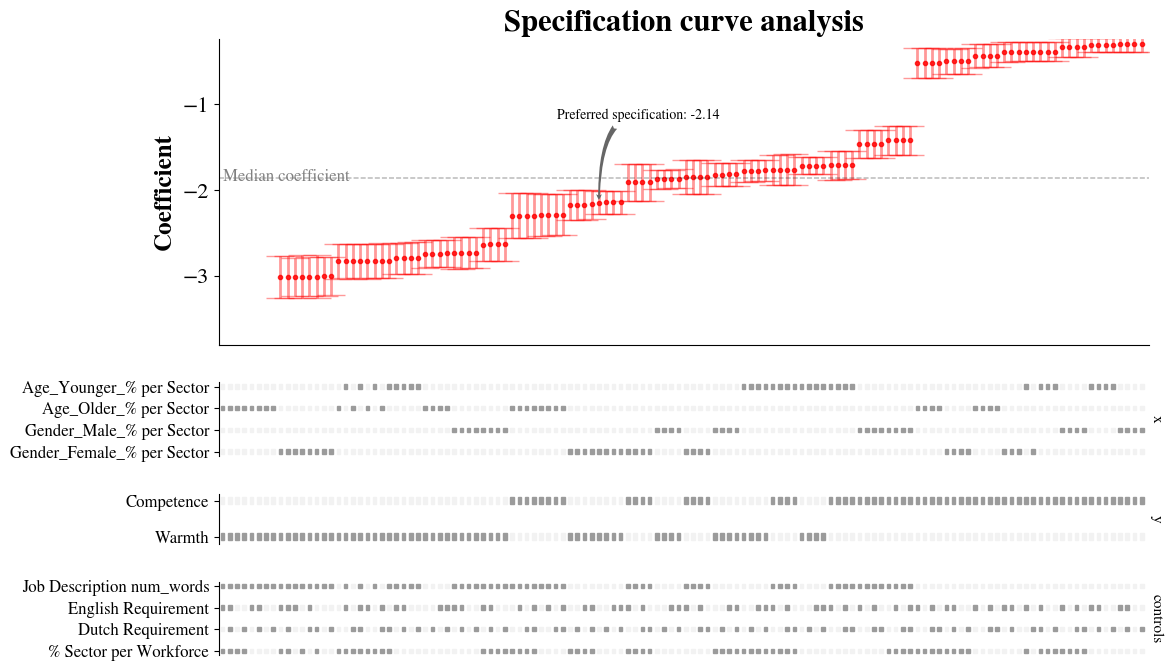

In [13]:
sc.plot(preferred_spec=['Gender_Female_% per Sector', 'Warmth'])


In [ ]:
sc.plot(preferred_spec=['Gender_Male_% per Sector', 'Competence'])


In [ ]:
sc.plot(preferred_spec=['Age_Older_% per Sector', 'Warmth'])


In [ ]:
sc.plot(preferred_spec=['Age_Younger_% per Sector', 'Competence'])


In [ ]:
sc.df_r['Results'].loc[sc.df_r['Specification'].isin(ivs_perc)]

In [ ]:
for model in female_log_models:
    print(model.summary())

In [ ]:
df_coeff_p = sc.df_r.loc[sc.df_r['coeff_pvals'] < 0.05].sort_values(by=['Coefficient'], ascending=False)[['Specification', 'Coefficient', 'coeff_pvals']].head(10)

In [ ]:
df_coeff_p

## OLS Specification Curve Analysis